In [1]:
## Getting the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

In [2]:
## Getting the data
df= pd. read_csv("/Datasets/Car_Insurance_Claim.csv")

In [3]:
## Changing data types of columns
df["AGE"]=df["AGE"].astype("category")
df["GENDER"]=df["GENDER"].astype("category")
df["RACE"]=df["RACE"].astype("category")
df["DRIVING_EXPERIENCE"]=df["DRIVING_EXPERIENCE"].astype("category")
df["EDUCATION"]=df["EDUCATION"].astype("category")
df["INCOME"]=df["INCOME"].astype("category")
df["VEHICLE_YEAR"]=df["VEHICLE_YEAR"].astype("category")
df["VEHICLE_TYPE"]=df["VEHICLE_TYPE"].astype("category")
df["INCOME"]=df["INCOME"].astype("category")
df["POSTAL_CODE"]=df["POSTAL_CODE"].astype("category")
df["MARRIED"]=df["MARRIED"].astype("category")
df["OUTCOME"]=df["OUTCOME"].astype("category")
df["VEHICLE_OWNERSHIP"]=df["VEHICLE_OWNERSHIP"].astype("category")
df["CHILDREN"]=df["CHILDREN"].astype("category")

In [4]:
##Dropping the ID variable
df=df.drop("ID",axis=1)


<AxesSubplot:title={'center':'Distribution of POSTAL_CODE'}>

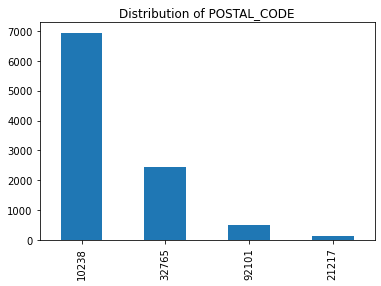

In [5]:
## Checking the POSTAL_CODE
df['POSTAL_CODE'].value_counts().plot(kind="bar", title="Distribution of POSTAL_CODE")
## We need to POSTAL_CODE to categorical datatype as there are only four postal codes. 
## But we cannot predict the response for new postal codes with this model.

In [ ]:
## Can add Extrpolatory Data Analysis
########################################

In [6]:
## Import libraries for missing value imputation
import miceforest as mf
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.impute import KNNImputer

In [7]:
kernel = mf.ImputationKernel(
  data=df,
  save_all_iterations=True,
  random_state=1343
)
# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(5,verbose=True)
#print(kernel)
completed_dataset = kernel.complete_data(dataset=0, inplace=False)

Initialized logger with name mice 1-5
Dataset 0
1  | ANNUAL_MILEAGE | CREDIT_SCORE
2  | ANNUAL_MILEAGE | CREDIT_SCORE
3  | ANNUAL_MILEAGE | CREDIT_SCORE
4  | ANNUAL_MILEAGE | CREDIT_SCORE
5  | ANNUAL_MILEAGE | CREDIT_SCORE


In [8]:
df=completed_dataset
df.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [9]:
## df_c complete df
df_c=df
df_c.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [10]:
# change the labels in MARRIED and CHILDREN column
df_c["MARRIED"]=df_c["MARRIED"].map({1: "MARRIED",0:"UNMARRIED"})
df_c["CHILDREN"]=df_c["CHILDREN"].map({1: "YES",0:"NO"})

In [11]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   AGE                  10000 non-null  category
 1   GENDER               10000 non-null  category
 2   RACE                 10000 non-null  category
 3   DRIVING_EXPERIENCE   10000 non-null  category
 4   EDUCATION            10000 non-null  category
 5   INCOME               10000 non-null  category
 6   CREDIT_SCORE         10000 non-null  float64 
 7   VEHICLE_OWNERSHIP    10000 non-null  category
 8   VEHICLE_YEAR         10000 non-null  category
 9   MARRIED              10000 non-null  category
 10  CHILDREN             10000 non-null  category
 11  POSTAL_CODE          10000 non-null  category
 12  ANNUAL_MILEAGE       10000 non-null  float64 
 13  VEHICLE_TYPE         10000 non-null  category
 14  SPEEDING_VIOLATIONS  10000 non-null  int64   
 15  DUIS                

In [12]:
df_c["MARRIED"].value_counts()

UNMARRIED    5018
MARRIED      4982
Name: MARRIED, dtype: int64

In [13]:
df_c["CHILDREN"].value_counts()

YES    6888
NO     3112
Name: CHILDREN, dtype: int64

In [38]:
## Split the dataset
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

## Dividing Predictors and Response 
X, y = df_c.iloc[:,:-1], df_c.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2, random_state=123)

In [39]:
# find numerical variables

numerical = [var for var in df.columns if df_c[var].dtype!='category']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']


In [40]:
## Encoding Categorical Variables
X_train=pd.concat([X_train[numerical],pd.get_dummies(X_train["AGE"]),
               pd.get_dummies(X_train.GENDER),
              pd.get_dummies(X_train.RACE),
               pd.get_dummies(X_train.DRIVING_EXPERIENCE),
               pd.get_dummies(X_train.EDUCATION),
               pd.get_dummies(X_train.INCOME),
               pd.get_dummies(X_train.VEHICLE_OWNERSHIP),
               pd.get_dummies(X_train.VEHICLE_YEAR),
               pd.get_dummies(X_train.MARRIED),
               pd.get_dummies(X_train.CHILDREN),
               pd.get_dummies(X_train.POSTAL_CODE),
               pd.get_dummies(X_train.VEHICLE_TYPE)],axis=1)
X_train.head()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,16-25,26-39,40-64,65+,female,...,UNMARRIED,MARRIED,NO,YES,10238,21217,32765,92101,sedan,sports car
9216,0.424541,11000.0,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,1
7324,0.329616,14000.0,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,1,0
918,0.359176,13000.0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
5902,0.647323,11000.0,5,0,5,0,0,1,0,1,...,0,1,0,1,1,0,0,0,1,0
2807,0.713374,10000.0,4,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0


In [41]:
X_train.columns

Index([       'CREDIT_SCORE',      'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
                      'DUIS',      'PAST_ACCIDENTS',               '16-25',
                     '26-39',               '40-64',                 '65+',
                    'female',                'male',            'majority',
                  'minority',                '0-9y',              '10-19y',
                    '20-29y',                '30y+',         'high school',
                      'none',          'university',        'middle class',
                   'poverty',         'upper class',       'working class',
                         0.0,                   1.0,          'after 2015',
               'before 2015',           'UNMARRIED',             'MARRIED',
                        'NO',                 'YES',                 10238,
                       21217,                 32765,                 92101,
                     'sedan',          'sports car'],
      dtype='object')

In [42]:
X_test=pd.concat([X_test[numerical],pd.get_dummies(X_test["AGE"]),
               pd.get_dummies(X_test.GENDER),
              pd.get_dummies(X_test.RACE),
               pd.get_dummies(X_test.DRIVING_EXPERIENCE),
               pd.get_dummies(X_test.EDUCATION),
               pd.get_dummies(X_test.INCOME),
               pd.get_dummies(X_test.VEHICLE_OWNERSHIP),
               pd.get_dummies(X_test.VEHICLE_YEAR),
               pd.get_dummies(X_test.MARRIED),
               pd.get_dummies(X_test.CHILDREN),
               pd.get_dummies(X_test.POSTAL_CODE),
               pd.get_dummies(X_test.VEHICLE_TYPE)],axis=1)
X_test.head()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,16-25,26-39,40-64,65+,female,...,UNMARRIED,MARRIED,NO,YES,10238,21217,32765,92101,sedan,sports car
2656,0.819135,11000.0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,0,0,1,1,0
445,0.644210,15000.0,0,0,0,0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,0
9505,0.591927,9000.0,14,2,3,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
332,0.507691,7000.0,3,1,4,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
4168,0.440388,4000.0,3,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0


In [43]:
## Normalizing numerical variables. The dummy variables for categorical variables will not be effected.

cols = X_train.columns

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [45]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [46]:
X_train.head()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,16-25,26-39,40-64,65+,female,...,UNMARRIED,MARRIED,NO,YES,10238,21217,32765,92101,sedan,sports car
0,0.409035,0.45,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.304430,0.60,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.337004,0.55,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.654535,0.45,0.227273,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.727322,0.40,0.181818,0.0,0.066667,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [78]:
#!pip install imbalanced-learn

In [47]:
## Oversampling , under sampling and SMOTE
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fit the model without SMOTE
logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

Model accuracy score: 0.8520
Precision : 0.9003
Recall or Sensitivity : 0.8819
f1_score : 0.8910
ROC AUC : 0.9236


<AxesSubplot:>

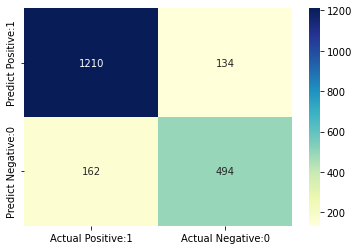

In [49]:
y_pred_test = logreg.predict(X_test)
y_pred1 = logreg.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
## f1-score
f1_score=2/((1/precision)+(1/recall))
print('f1_score : {0:0.4f}'.format(f1_score))
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Taking care of imbalanced response
Insurance data sets are predominantly imbalanced in terms of response as the number of claims are supposed to be very low in percentage. But this imbalance can affect our model. So, we use undersampling or oversampling method to balance the dataset. In this study, we are using SMOTE( Synthetic Minority Over Sampling Technique).

In [50]:
counter=Counter(y_train)
print("Before", counter)

Before Counter({0.0: 5523, 1.0: 2477})


In [51]:
## Oversampling with SMOTE
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print("After", counter)

After Counter({0.0: 5523, 1.0: 5523})


In [52]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model with SMOTE
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=0, solver='liblinear')

In [102]:
#print(classification_report(y_test, y_pred_test))

Model accuracy score: 0.8450
Precision : 0.8333
Recall or Sensitivity : 0.9287
f1_score : 0.8784
ROC AUC : 0.9234


<AxesSubplot:>

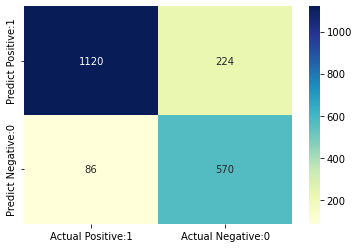

In [53]:
from sklearn.metrics import accuracy_score
y_pred_test = logreg.predict(X_test)
y_pred1 = logreg.predict_proba(X_test)[:, 1]
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
## f1-score
f1_score=2/((1/precision)+(1/recall))
print('f1_score : {0:0.4f}'.format(f1_score))
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## DecisionTreeClassifier

In [54]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

Model accuracy score: 0.8420
Precision : 0.8824
Recall or Sensitivity : 0.8824
f1_score : 0.8824
ROC AUC : 0.9132


<AxesSubplot:>

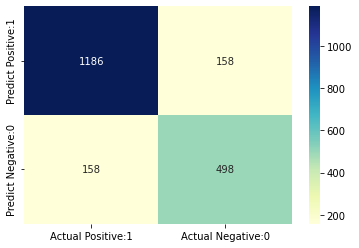

In [55]:
## DT without SMOTE

DT = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
DT.fit(X_train, y_train)
y_pred_test = DT.predict(X_test)
y_pred1 = DT.predict_proba(X_test)[:, 1]
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
## f1-score
f1_score=2/((1/precision)+(1/recall))
print('f1_score : {0:0.4f}'.format(f1_score))
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Model accuracy score: 0.8265
Precision : 0.8185
Recall or Sensitivity : 0.9144
f1_score : 0.8638
ROC AUC : 0.9090


<AxesSubplot:>

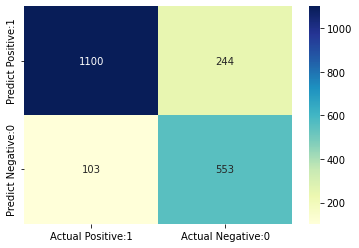

In [56]:
## DT with SMOTE

DT = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
DT.fit(X_train_sm, y_train_sm)
y_pred_test = DT.predict(X_test)
y_pred1 = DT.predict_proba(X_test)[:, 1]
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
## f1-score
f1_score=2/((1/precision)+(1/recall))
print('f1_score : {0:0.4f}'.format(f1_score))
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Random Forest Classifier

Model accuracy score: 0.8415
Precision : 0.9018
Recall or Sensitivity : 0.8676
f1_score : 0.8843
ROC AUC : 0.9146


<AxesSubplot:>

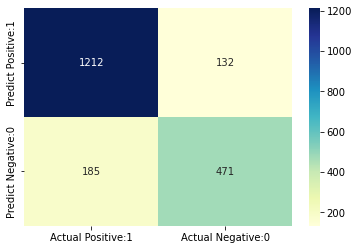

In [57]:
# create the classifier with n_estimators = 100 with max_depth=6 

# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(max_depth=6,n_estimators = 100, random_state=0)

# fit the model without SMOTE

rfc.fit(X_train, y_train)

y_pred_test = rfc.predict(X_test)
y_pred1 = rfc.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
## f1-score
f1_score=2/((1/precision)+(1/recall))
print('f1_score : {0:0.4f}'.format(f1_score))
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


Model accuracy score: 0.8425
Precision : 0.8400
Recall or Sensitivity : 0.9186
f1_score : 0.8776
ROC AUC : 0.9131


<AxesSubplot:>

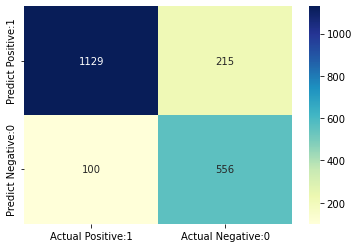

In [58]:
## With SMOTE
# create the classifier with n_estimators = 100 with max_depth=6 

# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(max_depth=6,n_estimators = 100, random_state=0)

# fit the model

rfc.fit(X_train_sm, y_train_sm)

## Predict
y_pred_test = rfc.predict(X_test)
y_pred1 = rfc.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
## f1-score
f1_score=2/((1/precision)+(1/recall))
print('f1_score : {0:0.4f}'.format(f1_score))
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



In [63]:
# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

## Looks like we can remove 'VEHICLE_TYPE, EDUCATION,RACE

0-9y                   0.174635
PAST_ACCIDENTS         0.092800
16-25                  0.086544
0.0                    0.078385
SPEEDING_VIOLATIONS    0.073807
1.0                    0.062310
after 2015             0.060351
before 2015            0.055215
20-29y                 0.039467
poverty                0.028985
21217                  0.027330
upper class            0.025720
26-39                  0.021003
10-19y                 0.020853
CREDIT_SCORE           0.019364
10238                  0.017825
UNMARRIED              0.014858
MARRIED                0.014835
male                   0.013460
female                 0.012411
30y+                   0.011894
65+                    0.008417
40-64                  0.008389
DUIS                   0.006883
ANNUAL_MILEAGE         0.004951
32765                  0.003553
YES                    0.003241
NO                     0.003210
working class          0.002722
92101                  0.001631
sedan                  0.000851
majority

In [59]:
## XGBOOST without SMOTE######
###############################

import xgboost as xgb
#Creating an XGBoost classifier
model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
#Training the model on the training data
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model accuracy score: 0.8400
Precision : 0.8869
Recall or Sensitivity : 0.8765
f1_score : 0.8817
ROC AUC : 0.9132


<AxesSubplot:>

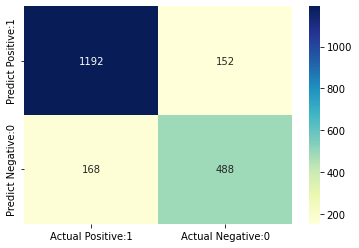

In [60]:
y_pred_test = model.predict(X_test)
y_pred1 = model.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
## f1-score
f1_score=2/((1/precision)+(1/recall))
print('f1_score : {0:0.4f}'.format(f1_score))
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
## Xgboost with SMOTE########
############################################

In [61]:
#Creating an XGBoost classifier
model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
#Training the model on the training data
model.fit(X_train_sm, y_train_sm)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model accuracy score: 0.8435
Precision : 0.8787
Recall or Sensitivity : 0.8873
f1_score : 0.8830
ROC AUC : 0.9121


<AxesSubplot:>

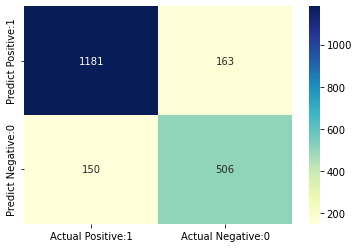

In [62]:
y_pred_test = model.predict(X_test)
y_pred1 = model.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
## f1-score
f1_score=2/((1/precision)+(1/recall))
print('f1_score : {0:0.4f}'.format(f1_score))
ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Conclusion
After checking several models with or without oversampling, we have found that logistics regression is producing the best predictive model. The other models are also close enough.